In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('airline cost new.csv')
df.head()

,num_pass,cost
0,61,4280
1,63,4080
2,67,4420
3,69,4170
4,70,4480


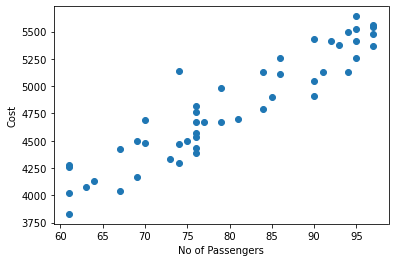

In [3]:
plt.scatter(df['num_pass'], df['cost'])
plt.xlabel('No of Passengers')
plt.ylabel('Cost')
plt.show()


In [4]:
import statsmodels.api as sm

In [5]:
y = df['cost']
X = df['num_pass']
Xc = sm.add_constant(X)
Xc.head()

,const,num_pass
0,1.0,61
1,1.0,63
2,1.0,67
3,1.0,69
4,1.0,70


In [6]:
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     302.2
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           4.23e-22
Time:                        11:32:49   Log-Likelihood:                -323.87
No. Observations:                  49   AIC:                             651.7
Df Residuals:                      47   BIC:                             655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1612.9763    185.831      8.680      0.000    1239.133    1986.820
num_pass      39.8941      2.295     17.383      0.000      35.277      44.511
==============================================================================
Omnibus:                        3.612   Durbin-Watson:                   2.624
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.700
Skew:                           0.556   Prob(JB):                        0.259
Kurtosis:                       3.296   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

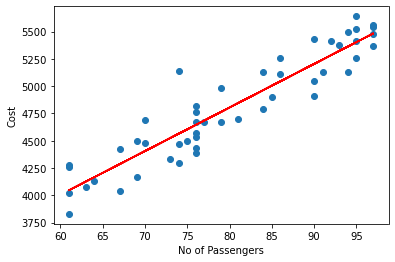

In [8]:
y_est = model.predict(Xc)

plt.scatter(df['num_pass'], df['cost'])
plt.plot(df['num_pass'], y_est, 'r')
plt.xlabel('No of Passengers')
plt.ylabel('Cost')
plt.show()